# Get British Columbia JSON

This Notebook extracts the British Columbia from the canada set, simplifies it and stores it as a JSON

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd 
from shapely.geometry import MultiPolygon, Polygon

In a first step, we use the basin_id to access the Caspian Sea basin. Then we extract the largest polygon which represents the outline of the basin.

Number of individual polygons: 28115


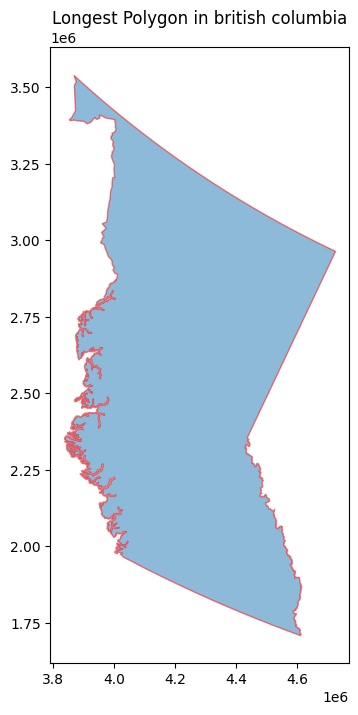

In [3]:
# Caspian Basin ID
# This ID is used to filter the shapefile for the Caspian Basin
#caspian_basin_id = 2020065840
british_columbia_id = "British Columbia"

# Read basin shapefiles
#basins = gpd.read_file('../data/hybas_eu_lev02_v1c/hybas_eu_lev02_v1c.shp')
canada = gpd.read_file('../Data/lpr_000b21a_e/lpr_000b21a_e.shp')

# Filter the basin with the given ID
#caspian_basin = basins[basins['HYBAS_ID'] == 2020065840]
british_columbia = canada[canada['PRENAME'] == "British Columbia"]

# Extract the geometry
#geom = caspian_basin.geometry.iloc[0]  # Get the first (and only) geometry
geom = british_columbia.geometry.iloc[0]  # Get the first (and only) geometry

# Check if it's a MultiPolygon
if isinstance(geom, MultiPolygon):
    polygons = list(geom.geoms)  # Extract individual polygons
elif isinstance(geom, Polygon):
    polygons = [geom]  # Treat a single Polygon as a list

# Print number of polygons
print(f"Number of individual polygons: {len(polygons)}")

# Find the polygon with the longest perimeter
longest_polygon = max(polygons, key=lambda p: p.length)

# Plot the longest polygon
fig, ax = plt.subplots(figsize=(10, 8))
gpd.GeoSeries(longest_polygon).plot(ax=ax, edgecolor='red', alpha=0.5)

plt.title("Longest Polygon in british columbia")
plt.show()

As the Polygon is quite detailed and we have the caspian sea on the inside, we need to do some further adjustment

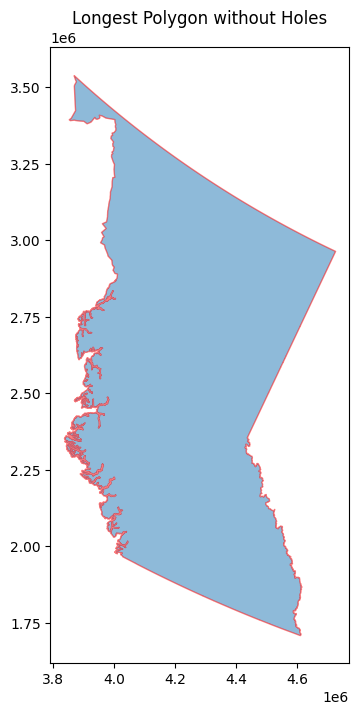

In [4]:
# Remove holes (interior rings)
longest_polygon_no_holes = Polygon(longest_polygon.exterior)
simplified_polygon = longest_polygon_no_holes.simplify(tolerance=0.1, preserve_topology=True)

# Plot the updated polygon
fig, ax = plt.subplots(figsize=(10, 8))
gpd.GeoSeries(simplified_polygon).plot(ax=ax, edgecolor='red', alpha=0.5)

plt.title("Longest Polygon without Holes")
plt.show()

Finally, we store the polygon as a JSON

In [5]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[simplified_polygon], crs="EPSG:4326")

# Save to a GeoJSON file
geojson_path = "../Data/britsh_columbia_no_holes.geojson"
gdf.to_file(geojson_path, driver="GeoJSON")

print(f"Saved to {geojson_path}")


Saved to ../Data/britsh_columbia_no_holes.geojson
